In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\monol\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("mergedData.csv", index_col=0)

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

df = df[df["Year"] >= 2003]

In [5]:
# Set features. This will also be used as our X values.

# economic data - 3 years rolling average GDP, Unemployment, Consumer Confidence, Median Income
selected_features1 = df.iloc[:,20:24]

# political data - current year presidential approval/disapproval rating
selected_features2 = df.iloc[:,49:51]

# genre data - comedy, documentary, sci-fi, etc.
selected_features3 = df.iloc[:,24:46]

# stock data - equity prices of S&P 500, Netflix
selected_features4 = df.iloc[:,52:54]

# merge everything
selected_features = pd.merge(selected_features1, selected_features2, left_index=True, right_index=True)
selected_features = pd.merge(selected_features, selected_features3, left_index=True, right_index=True)
selected_features = pd.merge(selected_features, selected_features4, left_index=True, right_index=True)

selected_features.head()

,GDP_AVG,Unemployment_AVG,Confidence_AVG,Median_Income_AVG,Approving,Disapproving,drama,comedy,thriller,romance,...,music,sport,history,war,musical,documentary,western,news,NFLX Adj Close,GSPC Adj Close
1,2.205866,7.202778,99.206066,56908.333333,44.129032,50.806452,0,0,0,0,...,0,0,0,0,0,0,0,0,51.775714,1889.767142
17,1.867082,5.500000,100.244875,59561.333333,65.666667,30.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1.637041,935.962853
18,1.867082,5.500000,100.244875,59561.333333,58.500000,37.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,3.615227,1080.635920
19,2.800599,5.766667,100.456963,59242.000000,47.000000,48.333333,0,1,0,0,...,0,0,0,0,0,0,0,0,3.773197,1105.846656
20,2.800599,5.766667,100.456963,59242.000000,51.000000,44.500000,0,1,0,0,...,0,0,0,0,0,0,0,0,4.609388,1133.078573


## Train/Test All Features

In [6]:
from sklearn.model_selection import train_test_split

# train_test likes numpy arrays, so transform dataframes into arrays
# reshape as needed by train_test
X = selected_features.to_numpy()
y = df["Box_Office_Adjusted"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Scale our data
from sklearn.preprocessing import MinMaxScaler

# create a scaler fit for training data
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

# scale the train and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

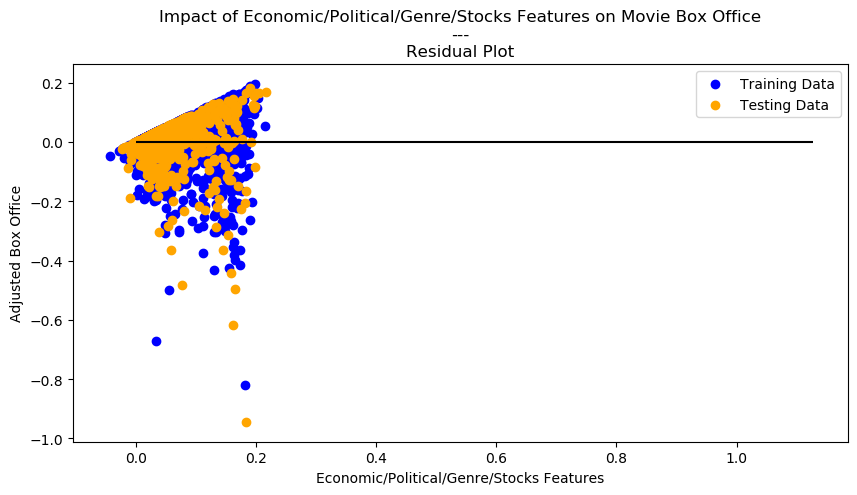

In [8]:
from sklearn.linear_model import LinearRegression

# use a linear regression model for our data
model = LinearRegression()

# fit training data for model
model.fit(X_train_scaled, y_train_scaled)

# create a residual plot of training and test data
plt.figure(figsize=(10,5), dpi=(100))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Impact of Economic/Political/Genre/Stocks Features on Movie Box Office\n---\nResidual Plot")
plt.xlabel("Economic/Political/Genre/Stocks Features")
plt.ylabel("Adjusted Box Office")
plt.savefig('images/001_all_features_ML.png')
plt.show()

In [9]:
# Display R^2 scores of training and test data
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.2511392525438577
Testing Data Score: 0.19565068264837282


## Train/Test Just Economic Features

In [10]:
from sklearn.model_selection import train_test_split

# train_test like numpy arrays, so transform dataframes into arrays
# reshape as needed by train_test
X = selected_features1.to_numpy()
y = df["Box_Office_Adjusted"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Scale our data
from sklearn.preprocessing import StandardScaler

# create a scaler fit for training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# scale the train and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

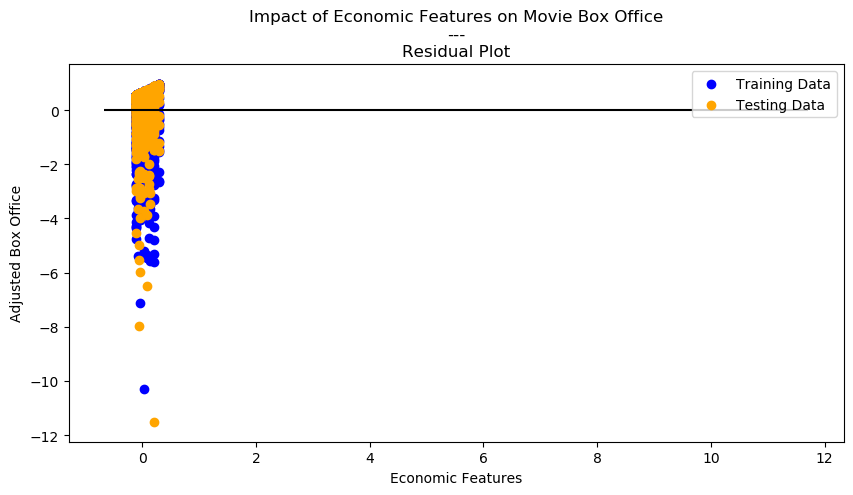

In [12]:
from sklearn.linear_model import LinearRegression

# use a linear regression model for our data
model = LinearRegression()

# fit training data for model
model.fit(X_train_scaled, y_train_scaled)

# create a residual plot of training and test data
plt.figure(figsize=(10,5), dpi=(100))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Impact of Economic Features on Movie Box Office\n---\nResidual Plot")
plt.xlabel("Economic Features")
plt.ylabel("Adjusted Box Office")
plt.savefig('images/002_economic_features_ML.png')
plt.show()

In [13]:
# Display R^2 scores of training and test data
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.01155722195933373
Testing Data Score: 0.011584270701709531


## Train/Test Just Political Features

In [14]:
from sklearn.model_selection import train_test_split

# train_test like numpy arrays, so transform dataframes into arrays
# reshape as needed by train_test
X = selected_features2.to_numpy()
y = df["Box_Office_Adjusted"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Scale our data
from sklearn.preprocessing import StandardScaler

# create a scaler fit for training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# scale the train and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

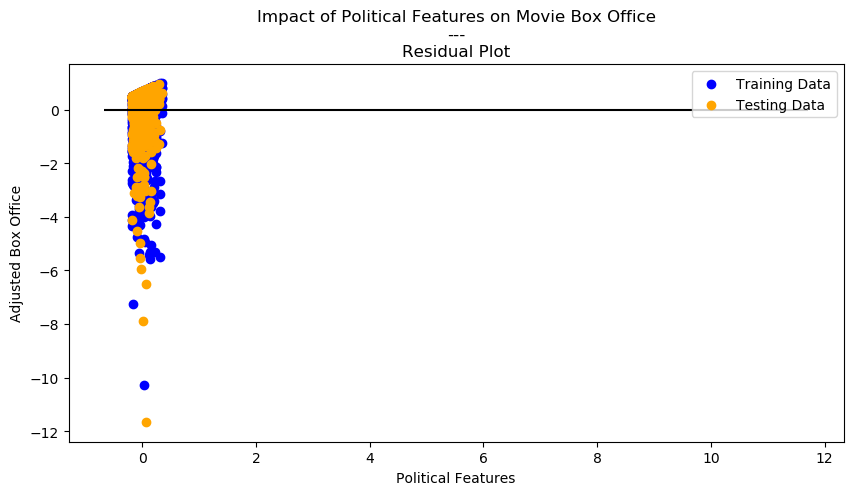

In [16]:
from sklearn.linear_model import LinearRegression

# use a linear regression model for our data
model = LinearRegression()

# fit training data for model
model.fit(X_train_scaled, y_train_scaled)

# create a residual plot of training and test data
plt.figure(figsize=(10,5), dpi=(100))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Impact of Political Features on Movie Box Office\n---\nResidual Plot")
plt.xlabel("Political Features")
plt.ylabel("Adjusted Box Office")
plt.savefig('images/003_political_features_ML.png')
plt.show()

In [17]:
# Display R^2 scores of training and test data
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.011530720249488646
Testing Data Score: -0.0003959243062587881


## Train/Test Just Genre Features

In [18]:
from sklearn.model_selection import train_test_split

# train_test like numpy arrays, so transform dataframes into arrays
# reshape as needed by train_test
X = selected_features3.to_numpy()
y = df["Box_Office_Adjusted"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Scale our data
from sklearn.preprocessing import StandardScaler

# create a scaler fit for training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# scale the train and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

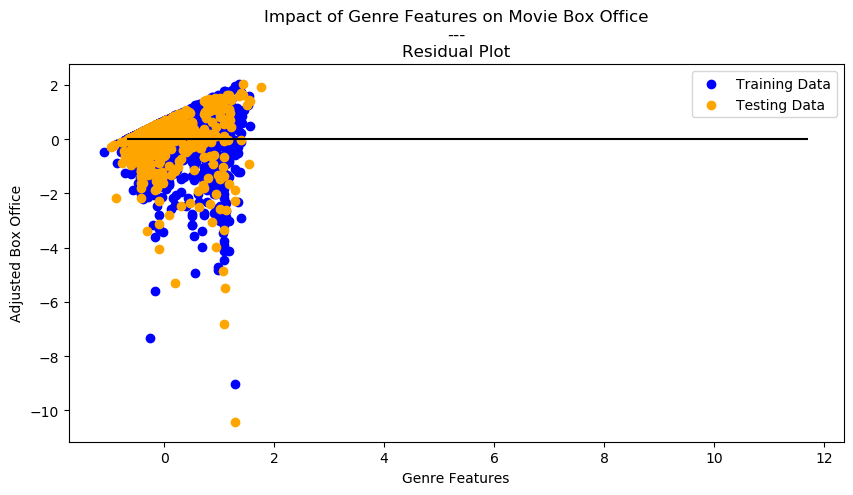

In [20]:
from sklearn.linear_model import LinearRegression

# use a linear regression model for our data
model = LinearRegression()

# fit training data for model
model.fit(X_train_scaled, y_train_scaled)

# create a residual plot of training and test data
plt.figure(figsize=(10,5), dpi=(100))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Impact of Genre Features on Movie Box Office\n---\nResidual Plot")
plt.xlabel("Genre Features")
plt.ylabel("Adjusted Box Office")
plt.savefig('images/004_genre_features_ML.png')
plt.show()

In [21]:
# Display R^2 scores of training and test data
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.24364675077169895
Testing Data Score: 0.19556461270342362


## Train/Test Just Stock Features

In [22]:
from sklearn.model_selection import train_test_split

# train_test like numpy arrays, so transform dataframes into arrays
# reshape as needed by train_test
X = selected_features4.to_numpy()
y = df["Box_Office_Adjusted"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Scale our data
from sklearn.preprocessing import StandardScaler

# create a scaler fit for training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# scale the train and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

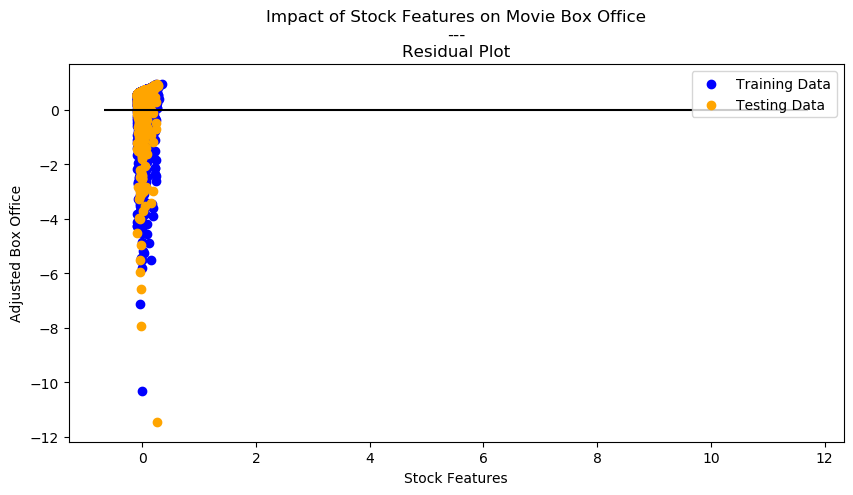

In [24]:
from sklearn.linear_model import LinearRegression

# use a linear regression model for our data
model = LinearRegression()

# fit training data for model
model.fit(X_train_scaled, y_train_scaled)

# create a residual plot of training and test data
plt.figure(figsize=(10,5), dpi=(100))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Impact of Stock Features on Movie Box Office\n---\nResidual Plot")
plt.xlabel("Stock Features")
plt.ylabel("Adjusted Box Office")
plt.savefig('images/005_stock_features_ML.png')
plt.show()

In [25]:
# Display R^2 scores of training and test data
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.00447765488512164
Testing Data Score: 0.007153854171215056
